<img src="https://raw.githubusercontent.com/saulocatharino/assistente_virtual/master/logobeetlabs.png" width=600>
<br><br>

<h1><b>MENTORIA PERSONALIZADA</b></h1><br>


---


## **RASTREAMENTO POR MÉTODO CASCADE** ##

<h5><b>HAAR</b></h5>
Um recurso do tipo Haar considera regiões retangulares vizinhas em um local específico em uma janela de detecção, soma as intensidades de pixel em cada região e calcula a diferença entre essas somas. Essa diferença é então usada para categorizar subseções de uma imagem, essa subseções são comumente chamadas 'Features'.
<br><br>
As intensidades das tonalidades de cinza de um rosto humano podem ser representadas por determinadas figuras básicas (features), portanto, o que este método faz é uma varredura em busca destas formas básicas em conjunto, como vemos na imagem abaixo, onde cada região é representada por uma 'feature'.
<br><br>
Este método foi criado por Viola and Jones no ano de 2001.
<br><br>
<img src='https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Haar-cascades-in-Computer-Vision-i2tutorials.jpg'>

O método Haar Cascade só pode ser aplicado em imagens monocromática, pois, busca por features neste padrão de cores, pode ser treinado para reconhecimento de diferentes objetos, desde que as features sejam claramente destacadas.<br><br>


## **DETECÇÃO FACIAL**

In [ ]:
# Download do modelo Haar Cascade para detecção facial
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml

# Download da imagem contendo faces
!wget https://static01.nyt.com/images/2019/10/02/video/02-still-for-america-room-loop/02-still-for-america-room-loop-superJumbo.jpg

--2022-04-02 14:30:00--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411388 (402K) [text/plain]
Saving to: ‘haarcascade_frontalcatface.xml’

haarcascade_frontal 100%[===================>] 401.75K  --.-KB/s    in 0.01s   

2022-04-02 14:30:01 (31.9 MB/s) - ‘haarcascade_frontalcatface.xml’ saved [411388/411388]

--2022-04-02 14:30:01--  https://static01.nyt.com/images/2019/10/02/video/02-still-for-america-room-loop/02-still-for-america-room-loop-superJumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request 

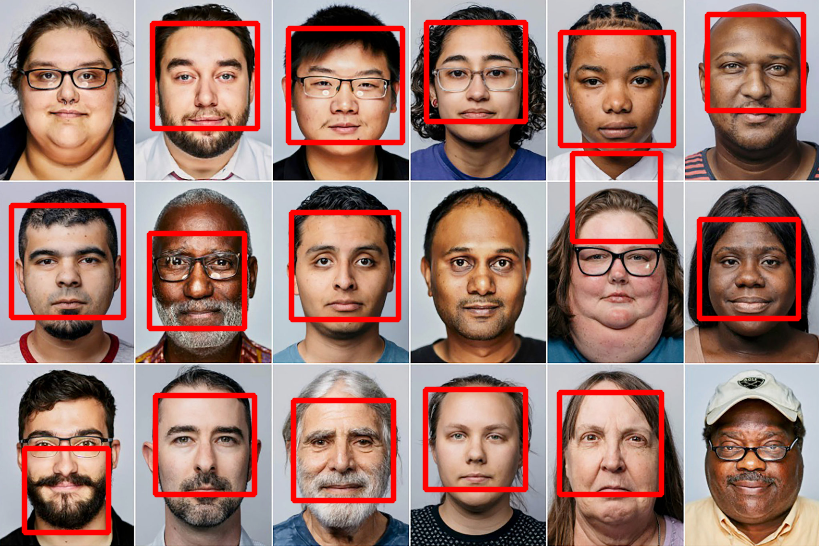

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# local do modelo treinado para rastreamento facial
cascade = 'haarcascade_frontalcatface.xml'

# Cria objeto com modelo treinado
detector = cv2.CascadeClassifier(cascade)

# Carrega imagem
img = cv2.imread("02-still-for-america-room-loop-superJumbo.jpg")

# Reduz tamanho da imagem para 40% do tamanho atual
img = cv2.resize(img,None, fx=.4, fy=.4)


# Converte imagem para tons de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Rastreia faces na imagem
faces = detector.detectMultiScale(img_gray, scaleFactor=1.05,  minNeighbors=2, minSize=(80,80))

# Plota um retângulo em cada face encontrada
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3, cv2.LINE_AA)

# Exibe imagem
cv2_imshow(img)

## **DETECÇÃO DE PLACAS**

In [ ]:
# Download do modelo de detecção de placas 
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml

# Download da imagem
!wget https://dinamicarpneus.com.br/sites/default/files/imagem/2019-09/exemplo-modelo-nova-placa-carro.jpg

!wget https://blog.carflix.com.br/wp-content/uploads/2018/10/Nova_Placa_Mercosul-649x433.jpg

--2022-04-02 14:49:24--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75482 (74K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml’

haarcascade_russian 100%[===================>]  73.71K  --.-KB/s    in 0.005s  

2022-04-02 14:49:24 (15.7 MB/s) - ‘haarcascade_russian_plate_number.xml’ saved [75482/75482]

--2022-04-02 14:49:24--  https://dinamicarpneus.com.br/sites/default/files/imagem/2019-09/exemplo-modelo-nova-placa-carro.jpg
Resolving dinamicarpneus.com.br (dinamicarpneus.com.br)... 104.21.68.211, 172.67.198.169, 2606:4700:3036::6815:44d3, ...
Connecting to dinamicarpneus.com.br (dinamicarpneus.com.br)|104.21.68.211|:443... conne

In [ ]:
!sudo apt install tesseract-ocr
!apt-get install tesseract-ocr-por
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,840 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

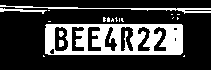

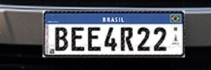

[BEEGR22 |



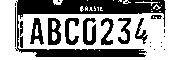

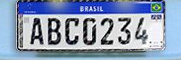

FABCG234



In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Biblioteca para extração de OCR 
import pytesseract

# local do modelo treinado para rastreamento de placa
cascade = 'haarcascade_russian_plate_number.xml'

# Cria objeto com modelo treinado
detector = cv2.CascadeClassifier(cascade)

# Carrega imagem
img1 = cv2.imread("exemplo-modelo-nova-placa-carro.jpg")
# redimensiona imagem
img1 = cv2.resize(img1, None, fx=.5, fy=.5)

# Carrega imagem
img2 = cv2.imread("Nova_Placa_Mercosul-649x433.jpg")


# Adiciona as duas imagens em uma lista
imgs =[img1,img2]

# Looping para cada imagem na lista
for img in imgs:

  # Converte imagem para tons de cinza
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Rastreia faces na imagem
  placas = detector.detectMultiScale(img_gray, scaleFactor=1.1,  minNeighbors=4)

  # Plota um retângulo em cada face encontrada
  for (x, y, w, h) in placas:

    # Corta região da detecção da placa
    imagem_da_placa = img[y:y+h,x:x+w]

    # Converte imagem em tons de cinza
    imagem_da_placa_gray = cv2.cvtColor(imagem_da_placa, cv2.COLOR_BGR2GRAY)


    # Aplica filtro binário na imagem
    _, imagem_da_placa_gray = cv2.threshold(imagem_da_placa_gray, 140, 255, cv2.THRESH_BINARY)


    cv2_imshow(imagem_da_placa_gray)

    # Converte conteúdo da imagem em texto
    placa = pytesseract.image_to_string(imagem_da_placa_gray)

    # Plota um retângulo nas coordenadas da placa
    cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 200, 255), 2, cv2.LINE_AA)

    cv2_imshow(imagem_da_placa)
    print(placa)


## **OCR PARA DOCUMENTOS (BÔNUS)**

In [ ]:
!wget https://fotos.web.sapo.io/i/B5a17c5ab/21971287_RwOzp.png

--2022-04-02 15:16:36--  https://fotos.web.sapo.io/i/B5a17c5ab/21971287_RwOzp.png
Resolving fotos.web.sapo.io (fotos.web.sapo.io)... 213.13.25.43, 213.13.25.12, 213.13.25.16, ...
Connecting to fotos.web.sapo.io (fotos.web.sapo.io)|213.13.25.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82962 (81K) [image/png]
Saving to: ‘21971287_RwOzp.png’

21971287_RwOzp.png  100%[===================>]  81.02K  --.-KB/s    in 0.1s    

2022-04-02 15:16:36 (581 KB/s) - ‘21971287_RwOzp.png’ saved [82962/82962]



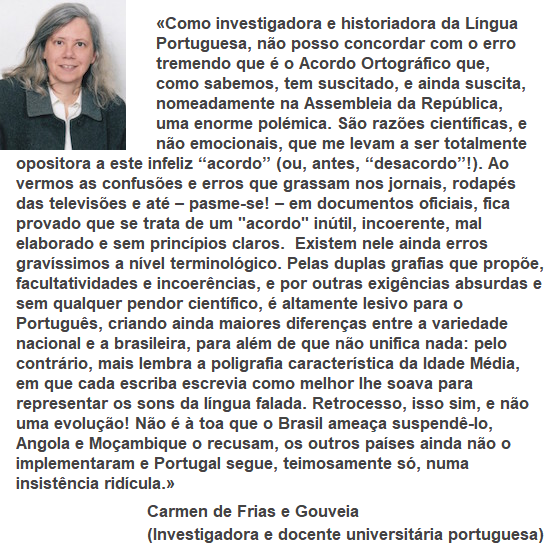

«Como investigadora e historiadora da Lingua
Portuguesa, não posso concordar com o erro
tremendo que é o Acordo Ortográfico que,
como sabemos, tem suscitado, e ainda suscita,

Pe nomeadamente na Assembleia da República,
uma enorme polémica. São razões científicas, e
não emocionais, que me levam a ser totalmente

opositora a este infeliz “acordo” (ou, antes, “desacordo”!). Ao

vermos as confusões e erros que grassam nos jornais, rodapés

das televisões e até — pasme-se! - em documentos oficiais, fica

provado que se trata de um "acordo" inútil, incoerente, mal

elaborado e sem princípios claros. Existem nele ainda erros
gravissimos a nível terminológico. Pelas duplas grafias que propõe,

facultatividades e incoerências, e por outras exigências absurdas e

sem qualquer pendor científico, é altamente lesivo para o

Português, criando ainda maiores diferenças entre a variedade

nacional e a brasileira, para além de que não unifica nada: pelo

contrário, mais lembra a poligrafia caracterist

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow


img = cv2.imread("21971287_RwOzp.png")

cv2_imshow(img)

texto = pytesseract.image_to_string(img, lang ='por')

print(texto)